In [1]:
import sympy as sym
import numpy as np
import matplotlib.pyplot as plt
from IPython.display import display, Math

# Calculus BUG HUNT!!

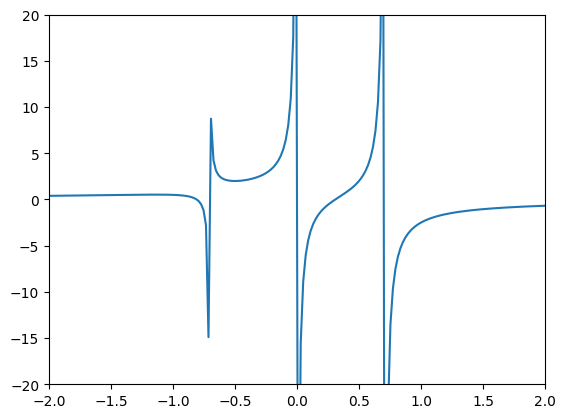

In [5]:
# evaluate a function in a range
from sympy.abc import x

fx = (4*x**3 + 2*x**2 - x) / (-4*x**4 + 2*x**2)

xrange = np.linspace(-2, 2, 200)
fxx = sym.lambdify(x, fx)

plt.plot(xrange, fxx(xrange))
plt.ylim([-20, 20])
plt.xlim(xrange[[0, -1]])
plt.show()

In [12]:
# compute the limit
x = sym.symbols('x')
fx = 1/(x+3)

lim_pnt = -3
lim = sym.limit(fx, x, lim_pnt, dir='+')

display(Math('\\lim_{x\\to %s^+} %s = %s' % (lim_pnt, sym.latex(fx), sym.latex(lim))))

<IPython.core.display.Math object>

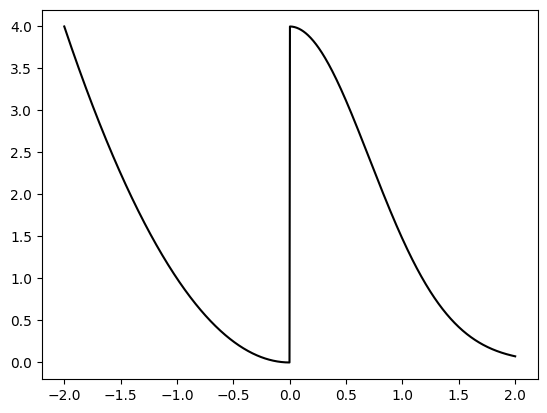

In [16]:
# piece-wise function
from sympy.abc import x

piece1 = x**2
piece2 = 4*sym.exp(-x**2)

# put them together with conditions
fx = sym.Piecewise( (piece1, x<0) , (piece2, x>=0))

# evaluate the function in a range
xx = np.linspace(-2,2,1000)
fxx = sym.lambdify(x,fx)

# show it in a plot
plt.plot(xx,fxx(xx),'k')

plt.show()

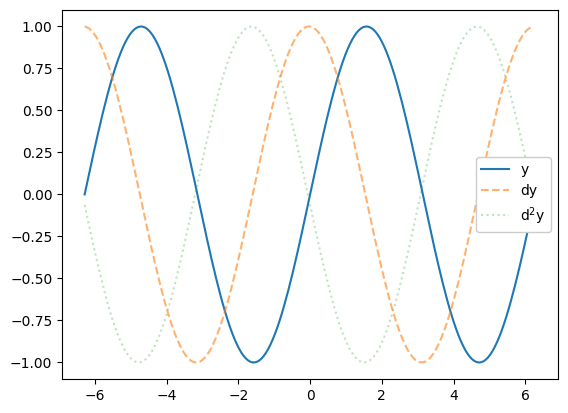

In [45]:
# show the first and second derivatives of sin(x)
x = np.linspace(-2*np.pi, 2*np.pi, 200)
dt = np.diff(x[:2])

y = np.sin(x)
dy = np.diff(y) / dt
ddy = np.diff(y, 2) / dt**2

plt.plot(x, y, label='y')
plt.plot(x[:-1], dy, '--', label='dy' , alpha=.6)
plt.plot(x[:-2], ddy, ':', label='d$^2$y', alpha=.3)

plt.legend(framealpha=1)
plt.show()

The critical points are: [-1, 0, 1]


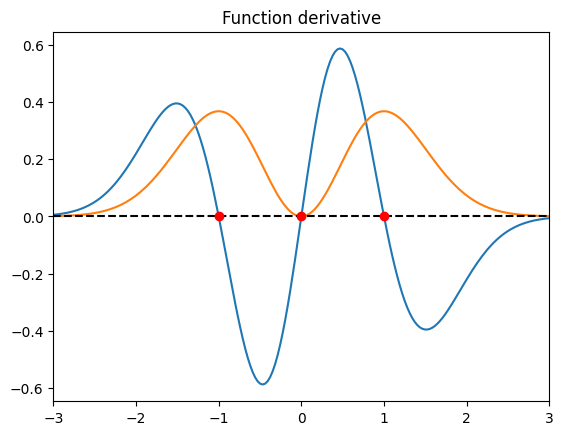

In [29]:
# Compute critical points using sympy

x = sym.symbols('x')
fx = x**2 * sym.exp(-x**2)

# derivative in sympy, solve
dfx = sym.diff(fx, x)
critpoints = sym.solve(dfx)
print('The critical points are: ' + str(critpoints))


# plot the function derivative and its critical points
y = sym.lambdify(x, dfx)
xx = np.linspace(-3,3,200)

plt.plot(xx, y(xx))
plt.plot(xx, sym.lambdify(x, fx)(xx))
plt.plot([-3,3],[0,0],'k--')
plt.xlim([-3,3])

for i in critpoints:
    plt.plot(i,0,'ro')

plt.title('Function derivative')
plt.show()

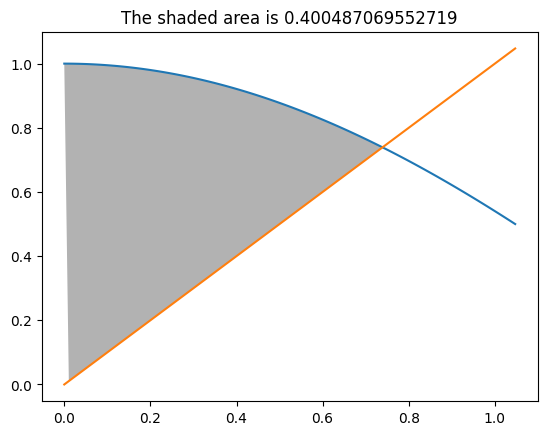

In [47]:
# Compute the area between two curves (not the same thing as Between Two Ferns)
from matplotlib.patches import Polygon


x = sym.symbols('x')
f1sym = sym.cos(x)
f2sym = x

xx = np.linspace(0, np.pi/3, 100)
f1 = np.cos(xx)
f2 = xx

fintersect = np.argmin(abs(f1-f2))

traceX = np.concatenate((xx[0:fintersect], xx[fintersect:0:-1]))
traceY = np.concatenate((f1[0:fintersect], f2[fintersect:0:-1]))

points = np.vstack((traceX, traceY)).T
p = Polygon(points, facecolor='k', alpha=.3)

fig, ax = plt.subplots()
ax.add_patch(p)


# area between two curves

A = sym.integrate(f1sym - f2sym, (x, xx[0], xx[fintersect]))

plt.plot(xx,f1, xx,f2)
plt.title('The shaded area is %s' % A)
plt.show()


In [39]:
A

0.400487069552719